## Data Analysis - Hypothesis Testing

In this notebook, we will perform hypothesis testing on the preprocessed datasets.Through hypothesis testing, we are trying to explore posting patterns and engagement across five mental health subreddits - Depression, Anxiety, Lonely, MentalHealth, and SuicideWatch.

Our goal is to understand differences in user behavior through the following hypothesis tests.

Following are the hypothesis tests:
1. T-Test - Compare post length between Depression and Anxiety.  
2. ANOVA - Test if post scores i.e. upvotes differ significantly between subreddits.

In [1]:
import os
import pandas as pd
from pathlib import Path
import re
import csv
import hashlib
import ast

print(os.getcwd())
os.chdir("OriginalRedditDataSet/Preprocessed_Data/")
print(os.getcwd())

d:\Data602\Project\VentBuddy-A-Data-Driven-Companion-for-Mental-Health-Support
d:\Data602\Project\VentBuddy-A-Data-Driven-Companion-for-Mental-Health-Support\OriginalRedditDataSet\Preprocessed_Data


In [2]:
anx_df = pd.read_csv('anx_data_cleaned.csv')
dep_df = pd.read_csv('dep_data_cleaned.csv')
lon_df = pd.read_csv('lon_data_cleaned.csv')
mh_df = pd.read_csv('mh_data_cleaned.csv')
sw_df = pd.read_csv('sw_data_cleaned.csv')

df = pd.concat([dep_df, anx_df, lon_df, mh_df, sw_df], ignore_index=True)

### Hypothesis 1: Post Length Difference Between Depression and Anxiety
#### Goal: To test whether users in the Depression subreddit write longer posts than users in Anxiety.

#### Statistical Method: Two-sample T-Test comparing mean post lengths.

* H₀: Mean post length (Depression) = Mean post length (Anxiety)  
* H₁: Mean post length (Depression) ≠ Mean post length (Anxiety)


T-statistic: -21.788, P-value: 0.0000


C:\Users\prady\AppData\Local\Temp\ipykernel_24068\700692308.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subreddit', y='post_length',


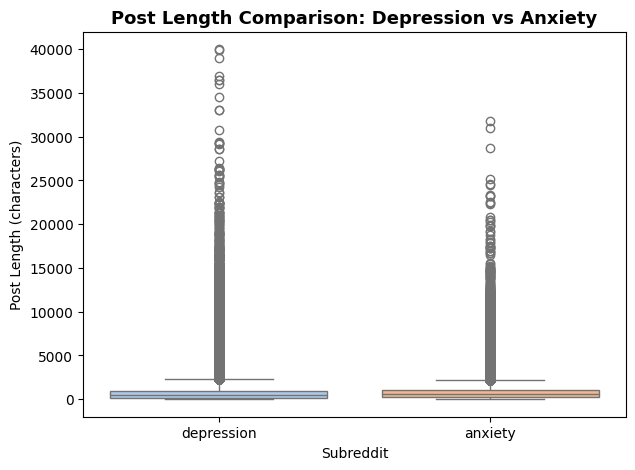

In [4]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['post_length'] = df['selftext'].astype(str).apply(len)

dep_len = df[df['subreddit'].str.lower() == 'depression']['post_length']
anx_len = df[df['subreddit'].str.lower() == 'anxiety']['post_length']

t_stat, p_val = ttest_ind(dep_len, anx_len, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

plt.figure(figsize=(7,5))
sns.boxplot(x='subreddit', y='post_length',
            data=df[df['subreddit'].isin(['depression','anxiety'])],
            palette='pastel')
plt.title("Post Length Comparison: Depression vs Anxiety", fontsize=13, weight='bold')
plt.xlabel("Subreddit")
plt.ylabel("Post Length (characters)")
plt.show()

#### Observation : 
The data is highly right-skewed, meaning most values are small while a few extremely large outliers stretch the scale.

The logarithmic transformation compresses these extreme values and expands the dense lower range.  
In our case, it reveals the true shape of the central distribution, makes differences between groups easier to compare and prevent a few outliers from visually dominating the plot

Overall, log transformation makes skewed data more interpretable and visually balanced without removing information


### Log transformation

C:\Users\prady\AppData\Local\Temp\ipykernel_24068\2132933457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subreddit', y='post_length', data=df[df['subreddit'].isin(['depression','anxiety'])], palette='pastel')


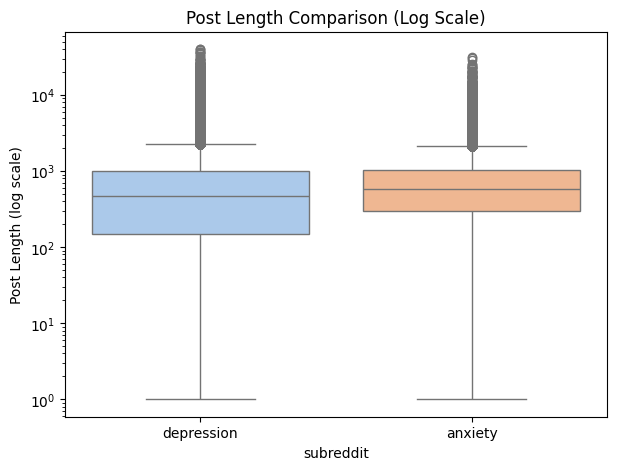

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(x='subreddit', y='post_length', data=df[df['subreddit'].isin(['depression','anxiety'])], palette='pastel')
plt.yscale('log')
plt.title("Post Length Comparison (Log Scale)")
plt.ylabel("Post Length (log scale)")
plt.show()

### Conclusion
1. The log-scale transformation compresses extreme outliers and expands the dense mid-range, allowing a clearer comparison between the Depression and Anxiety communities.  
2. Both subreddits show similar median post lengths (around 10² - 10³ characters) but Depression posts have a slightly wider spread and more upper outliers, indicating a few very long, detailed posts.  
3. The lower whiskers extend to around 10¹ characters, showing that some users post extremely short messages in both communities.  
4. The overall symmetry and spread on the log scale highlight that both groups are highly right-skewed in raw form, but the central tendencies remain comparable after scaling.  
5. Combined with the T-test result (p < 0.05), the plot supports that Depression posts are generally longer and more variable than Anxiety posts, confirming a statistically significant difference in writing behavior.


### Hypothesis 2: Variation in Post Scores Across Subreddits
#### Goal: To test whether the average upvote scores differ significantly between subreddits.

#### Statistical Method: One-Way ANOVA

* H₀: Mean post score is the same across all subreddits.  
* H₁: At least one subreddit has a different mean post score.


F-statistic: 214.844, P-value: 0.0000


C:\Users\prady\AppData\Local\Temp\ipykernel_24068\4035492090.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='subreddit', y='score', data=df, palette='muted')


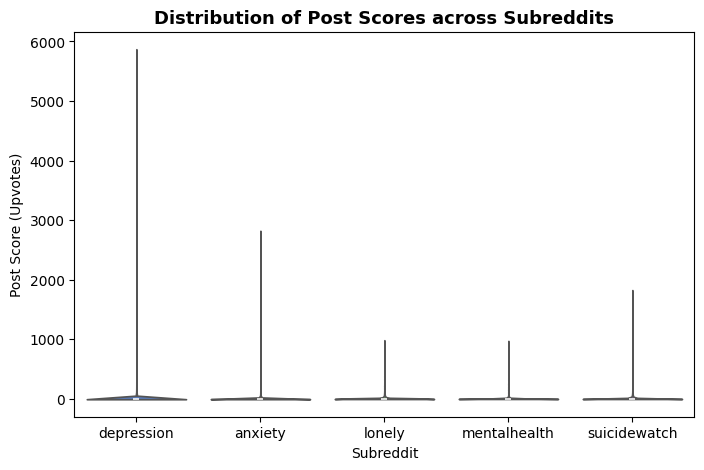

In [6]:
from scipy.stats import f_oneway

grouped_scores = [grp['score'].dropna() for _, grp in df.groupby('subreddit')]

f_stat, p_val = f_oneway(*grouped_scores)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")

plt.figure(figsize=(8,5))
sns.violinplot(x='subreddit', y='score', data=df, palette='muted')
plt.title("Distribution of Post Scores across Subreddits", fontsize=13, weight='bold')
plt.xlabel("Subreddit")
plt.ylabel("Post Score (Upvotes)")
plt.show()


### Observation :
Upvote counts are heavily skewed i.e. most posts receive few upvotes while a few posts reach thousands.  
This compresses visible differences between communities and masks central tendencies.  

So, we are applying a logarithmic scale to makes differences easier to interpret by compressing extreme outliers, expanding the region where most posts lie and revealing meaningful differences in engagement patterns.

### Log Transformation

C:\Users\prady\AppData\Local\Temp\ipykernel_24068\2814512417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='subreddit', y='score', data=df, palette='muted')


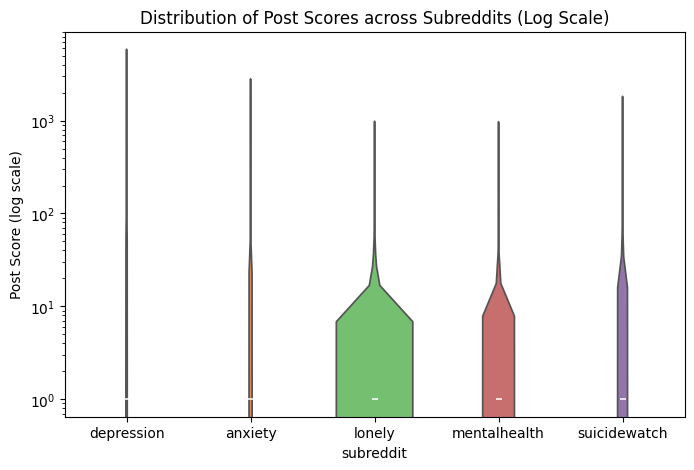

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(x='subreddit', y='score', data=df, palette='muted')
plt.yscale('log')
plt.title("Distribution of Post Scores across Subreddits (Log Scale)")
plt.ylabel("Post Score (log scale)")
plt.show()

### Conclusion:

1.  The log-scaled violin plot shows that most posts receive between 1 - 50 upvotes while a few reach thousands.
2.  Depression and MentalHealth have the widest distributions, indicating a few highly popular posts.
3.  Lonely has a broader midsection, suggesting consistent medium-level engagement.  
4.  Anxiety and SuicideWatch communities typically receive lower upvotes overall.
5. The ANOVA test with F = 214.84 and p < 0.001 confirms that average post scores differ significantly across subreddits. This shows that community engagement intensity varies between mental-health forums and larger or more supportive communities attract more visibility.
